<a href="https://colab.research.google.com/github/trm2yf/STC_Capstone/blob/main/utill_copy_of_maxar_gdal_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
# #!apt update
# #!apt upgrade
# !apt install gdal-bin python-gdal python3-gdal

from osgeo import gdal
import os
import numpy as np
import requests
import matplotlib.pyplot as plt
import pickle
#Test github push

In [3]:
##Need to have Shared acces to MAXAR Folder
## After data is shared with you, go to "Shared with me" on dropdown, right click the folder and "Add shortcut to Drive"
## Now you will be able to see the folder when you mount your drive to colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
###Configs###
#Path to data folder
datadir = '/content/drive/MyDrive/MAXAR/'

#Download Turkey Eq and Hurricane Florence data - takes long time
downloadData = False

#Overlap configs
## Calc overlaps - takes a long time
calcOverlaps = True
##save to a pickle so we can reuse
savetoPickle = True

##

In [5]:
#load the utility functions
import importlib.util
spec = importlib.util.spec_from_file_location("utils", datadir + "utilitiesTest.py")
utils = importlib.util.module_from_spec(spec)
spec.loader.exec_module(utils)
utils.test()

Hello World


In [6]:
help(utils.test)

Help on function test:

test()
    This function Tests if we imported the module
    :rtype: None



In [7]:
from inspect import getmembers, isfunction
print ([o[0] for o in getmembers(utils) if isfunction(o[1])])

['crop_images_rand', 'downloadTurkeyEq', 'download_image', 'overlap_check', 'plot_image', 'pre_post_Overlaps', 'size_check', 'test']


## Download Turkey Earthquake images from MAXAR to Drive folder

In [ ]:
#downloadData = True
if downloadData:
  utils.downloadTurkeyEq(datadir)
else:
  print("No files downloaded")


--2021-07-13 20:00:26--  https://opendata.digitalglobe.com/events/turkey-earthquake20/pre-event/2020-04-27/105001001CC33300/105001001CC33300.tif
Resolving opendata.digitalglobe.com (opendata.digitalglobe.com)... 52.85.89.99, 52.85.89.30, 52.85.89.92, ...
Connecting to opendata.digitalglobe.com (opendata.digitalglobe.com)|52.85.89.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1118011015 (1.0G) [image/tiff]
Saving to: ‘datadir/105001001CC33300.tif’

105001001CC33300.ti  36%[======>             ] 392.00M  28.6MB/s    eta 22s    ^C
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
--2021-07-13 20:00:39--  https://opendata.digitalglobe.com/events/turkey-earthquake20/pre-event/2020-04-27/105001001CC33200/105001001CC33200.tif
Resolving opendata.digitalglobe.com (opendata.digitalglobe.com)... 13.226.36.109, 13.226.36.41, 13.226.36.54, ...
Connecting to opendata.digitalglobe.com (opendata.digitalglo

## Download Hurricane Florence images to Drive Folder

### Declare Lists

In [ ]:
florence_pre = ['https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-29/1030010086710A00/1030010086710A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-29/1030010085D38D00/1030010085D38D00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-29/10300100856CBA00/10300100856CBA00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-29/10300100820EC200/10300100820EC200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-28/10400100411EDD00/10400100411EDD00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-27/104001004105E500/104001004105E500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-26/1050010011C16400/1050010011C16400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-23/1050010011B67500/1050010011B67500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-23/104001004196C200/104001004196C200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-23/1030010084642F00/1030010084642F00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-23/103001008389E000/103001008389E000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-21/103001008372E000/103001008372E000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-20/1030010082730C00/1030010082730C00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-15/1040010042568800/1040010042568800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-15/1040010041541200/1040010041541200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-15/104001003F2F0B00/104001003F2F0B00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-15/1030010084A3A200/1030010084A3A200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-12/1030010083534800/1030010083534800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-12/1030010082980500/1030010082980500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-10/1030010083384B00/1030010083384B00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-10/103001008319C500/103001008319C500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-07/10500100117B2400/10500100117B2400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-07/10300100833A1700/10300100833A1700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-03/104001004020F400/104001004020F400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-24/1030010080C1DE00/1030010080C1DE00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-19/1030010082405200/1030010082405200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-19/1030010081A98000/1030010081A98000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-19/10300100813C7100/10300100813C7100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-19/103001007EC02500/103001007EC02500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-15/104001003FB34600/104001003FB34600.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-15/104001003F9FCA00/104001003F9FCA00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-15/104001003F2E7100/104001003F2E7100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-15/104001003F028A00/104001003F028A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-15/104001003ED5FB00/104001003ED5FB00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-11/1050010011121000/1050010011121000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-11/103001007F153700/103001007F153700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-10/104001003F15C800/104001003F15C800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-10/104001003E763D00/104001003E763D00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-09/104001003FC87E00/104001003FC87E00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-09/104001003FC5C400/104001003FC5C400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-09/104001003FAF9700/104001003FAF9700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-09/104001003F960D00/104001003F960D00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-09/104001003F2B0700/104001003F2B0700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-08/105001001105DA00/105001001105DA00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-02/104001003FAD6500/104001003FAD6500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-02/104001003F613300/104001003F613300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-07-02/104001003E33A700/104001003E33A700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-30/1050010010BE8400/1050010010BE8400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-30/103001007F10F400/103001007F10F400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-21/104001003F6C8B00/104001003F6C8B00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-21/104001003E7B6200/104001003E7B6200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-21/104001003DD78000/104001003DD78000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-21/104001003D940C00/104001003D940C00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-19/1050010010940000/1050010010940000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-19/104001003E6DDE00/104001003E6DDE00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-19/104001003E59EC00/104001003E59EC00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-19/1030010080C6F300/1030010080C6F300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-19/103001007F65AF00/103001007F65AF00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-19/103001007F5D9800/103001007F5D9800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-08/104001003EBE5800/104001003EBE5800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-08/104001003E5BB800/104001003E5BB800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-07/104001003D055200/104001003D055200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-06/10200100705F9000/10200100705F9000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-05/10500100105DA200/10500100105DA200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-06-05/103001007EB2C100/103001007EB2C100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-23/1030010080602200/1030010080602200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-23/103001007F768000/103001007F768000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-13/104001003E929400/104001003E929400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-13/104001003A880F00/104001003A880F00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-12/103001007E3FAA00/103001007E3FAA00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-12/103001007D42E100/103001007D42E100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-12/103001007BB28C00/103001007BB28C00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-09/103001007DCA0F00/103001007DCA0F00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-08/104001003C02E600/104001003C02E600.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-03/103001007C63FE00/103001007C63FE00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-03/103001007C05AC00/103001007C05AC00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-02/104001003B17FF00/104001003B17FF00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-02/104001003A8E6D00/104001003A8E6D00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-01/105001000FAED000/105001000FAED000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-01/103001007D217900/103001007D217900.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-01/103001007C712200/103001007C712200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-05-01/103001007B378700/103001007B378700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-30/104001003B518B00/104001003B518B00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-28/105001000FA28200/105001000FA28200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-25/104001003B886A00/104001003B886A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-25/104001003B27E000/104001003B27E000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-20/104001003A746500/104001003A746500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-20/103001007EBAE400/103001007EBAE400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-18/104001003C339300/104001003C339300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-18/104001003B103900/104001003B103900.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-17/105001000F76A800/105001000F76A800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-17/105001000F76A700/105001000F76A700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-17/103001007D287700/103001007D287700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-12/104001003A6F1500/104001003A6F1500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-12/103001007AD36800/103001007AD36800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-11/104001003B57A400/104001003B57A400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-09/1040010039BF1A00/1040010039BF1A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-08/105001000E400F00/105001000E400F00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-05/10300100779E3300/10300100779E3300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-05/10300100772E1000/10300100772E1000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-05/10300100763DE000/10300100763DE000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-03/1040010036792500/1040010036792500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-03/1030010079134800/1030010079134800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-03/10300100782C3500/10300100782C3500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-01/1040010038A44B00/1040010038A44B00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-01/1040010037A64500/1040010037A64500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-31/105001000E238900/105001000E238900.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-31/105001000E238800/105001000E238800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-31/1030010078268700/1030010078268700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-31/1030010077570900/1030010077570900.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-31/1030010076D0BC00/1030010076D0BC00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-31/1030010076B7B800/1030010076B7B800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-31/10300100764EBF00/10300100764EBF00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-26/1030010078514500/1030010078514500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-26/1030010077086700/1030010077086700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-26/103001007685F300/103001007685F300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-25/105001000E0DD400/105001000E0DD400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-21/10200100706FAD00/10200100706FAD00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-21/102001006E405A00/102001006E405A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-21/102001006D99AF00/102001006D99AF00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/105001000DD53000/105001000DD53000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/105001000DD52F00/105001000DD52F00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/105001000DD52E00/105001000DD52E00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/10400100379DDF00/10400100379DDF00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/1040010037907200/1040010037907200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/1040010037064A00/1040010037064A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/103001007840BD00/103001007840BD00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/1030010077930000/1030010077930000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/1030010077708A00/1030010077708A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/10300100775E1F00/10300100775E1F00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/1030010076C46A00/1030010076C46A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-20/1030010076915F00/1030010076915F00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-15/1040010037C77A00/1040010037C77A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-15/103001007619F200/103001007619F200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-14/1040010037A4E800/1040010037A4E800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-14/10400100367D5500/10400100367D5500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-08/1040010037CE9300/1040010037CE9300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-08/102001006CD97300/102001006CD97300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-06/105001000DA7E600/105001000DA7E600.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-04/105001000DA16400/105001000DA16400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-04/10300100769F6E00/10300100769F6E00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-04/102001006F4C0400/102001006F4C0400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-02/10400100352A4A00/10400100352A4A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-01-01/10400100380D1C00/10400100380D1C00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2017-06-06/103001006BD64A00/103001006BD64A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2017-05-10/1030010069A2E700/1030010069A2E700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2016-08-10/10400100203FE400/10400100203FE400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-09-06/1030010084721600/1030010084721600.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-09-05/1030011084168000/1030011084168000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-29/1050010011CD1D00/1050010011CD1D00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-29/10400100426F5F00/10400100426F5F00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-08-29/1040010040185100/1040010040185100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-11/104001003B52DF00/104001003B52DF00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-06/105001000F48CD00/105001000F48CD00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-06/104001003BC9F300/104001003BC9F300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-06/104001003BC6FF00/104001003BC6FF00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-06/104001003A325400/104001003A325400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-06/103001007D662B00/103001007D662B00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-05/104001003C8BE800/104001003C8BE800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-05/104001003AB40200/104001003AB40200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-01/105001000F34A800/105001000F34A800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-01/103001007C7F7000/103001007C7F7000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-01/103001007BA0D300/103001007BA0D300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-01/103001007B2B9C00/103001007B2B9C00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-01/103001007A4E5400/103001007A4E5400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-04-01/1030010079295A00/1030010079295A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-31/104001003A32FA00/104001003A32FA00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-24/103001007A652300/103001007A652300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-18/105001000ED38900/105001000ED38900.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-18/104001003A455400/104001003A455400.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-18/10400100394DF000/10400100394DF000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-16/103001007B3FB900/103001007B3FB900.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-16/103001007A42B900/103001007A42B900.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-16/1030010079CA3100/1030010079CA3100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-16/103001007987C900/103001007987C900.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-16/10300100791E9700/10300100791E9700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-15/105001000EC79100/105001000EC79100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-13/103001007B4E1E00/103001007B4E1E00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-13/103001007B264100/103001007B264100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-13/103001007A8C5B00/103001007A8C5B00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-13/103001007A32D500/103001007A32D500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-13/1030010079974300/1030010079974300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-13/1030010078222700/1030010078222700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-13/1030010078201700/1030010078201700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-13/102001007155EE00/102001007155EE00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-13/10200100709CE300/10200100709CE300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-09/1020010071923800/1020010071923800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-09/102001006F991000/102001006F991000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-05/104001003950EB00/104001003950EB00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-05/103001007AD84B00/103001007AD84B00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-05/103001007AA7BA00/103001007AA7BA00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-05/103001007AA56600/103001007AA56600.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-03-04/10200100720EA700/10200100720EA700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-27/105001000E899100/105001000E899100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-27/105001000E899000/105001000E899000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-27/1040010039CBBF00/1040010039CBBF00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-27/1040010039C44A00/1040010039C44A00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-27/104001003921FC00/104001003921FC00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-27/104001003905D200/104001003905D200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-24/1020010072B67700/1020010072B67700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-24/10200100717F3100/10200100717F3100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-24/102001006F9BEC00/102001006F9BEC00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-16/105001000E5E0E00/105001000E5E0E00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/pre-event/2018-02-15/104001003810AE00/104001003810AE00.tif']

florence_post = ['https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-10-30/103001008856B300/103001008856B300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-10-10/104001004262FC00/104001004262FC00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-22/1040010042181500/1040010042181500.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-22/10300100864C2900/10300100864C2900.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-22/103001008600A600/103001008600A600.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-22/1030010085471D00/1030010085471D00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-21/102001007A5C9D00/102001007A5C9D00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-21/102001007A0A9100/102001007A0A9100.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-21/1020010079DC1300/1020010079DC1300.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-21/1020010079CFE800/1020010079CFE800.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-21/10200100796D7E00/10200100796D7E00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-21/10200100792DA200/10200100792DA200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-21/1020010076722200/1020010076722200.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-20/1050010012411700/1050010012411700.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-20/1050010012411600/1050010012411600.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-18/10500100123A5000/10500100123A5000.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-18/10500100123A4F00/10500100123A4F00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-18/10500100123A4E00/10500100123A4E00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-18/10500100123A4D00/10500100123A4D00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-17/1050010012366F00/1050010012366F00.tif',
'https://opendata.digitalglobe.com/events/hurricane-florence/post-event/2018-09-16/1040010041515800/1040010041515800.tif']

### Download Images

In [ ]:
#get pre disaster data, takes a long time
#Currently assumes all folders/subfolderes exist
downloadData = True
if downloadData:
  for i in range(len(florence_pre)):
    utils.download_image(datadir, path = florence_pre[i],  event = "hurricane_florence", time = 'pre')
    if i == 1:
      break

KeyboardInterrupt: ignored

In [ ]:
#get post disaster data, takes a long time
#Currently assumes all folders/subfolderes exist
if downloadData:
  for i in range(len(florence_post)):
    utils.download_image(datadir, path = florence_post[i], event = "hurricane_florence", time = 'post')

## Compare image overlap

In [ ]:
pre_images = [datadir + 'hurricane_florence/pre/' + a for a in os.listdir(datadir + 'hurricane_florence/pre/')]
post_images = [datadir + 'hurricane_florence/post/' + a for a in os.listdir(datadir + 'hurricane_florence/post/')]

In [ ]:
post_images[0].split("/")[7].split(".")[0]

'103001008856B300'

In [ ]:
# use if we have already loaded overlaps into pickle
with open(datadir + 'overlaps.pkl', 'rb') as f:
  overlaps = pickle.load(f)

## Crop images

In [ ]:
import os
for overlap in overlaps[:1]:
  utils.crop_images_rand(datadir, overlap, event='hurricane_florence')

finished 103001008856B300+103001008372E000


## Display images

In [ ]:
os.listdir(datadir +'turkey_earthquake/overlaps/post10300100B0280300_pre10300500A4F8E700')

['crop10300100B0280300.tif',
 'crop10300100B0280300.tif.msk',
 'crop10300500A4F8E700.tif',
 'crop10300500A4F8E700.tif.msk']

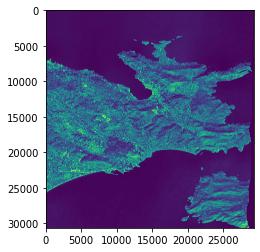

In [ ]:
utils.plot_image(datadir +'turkey_earthquake/overlaps/post10300100B0280300_pre10300500A4F8E700/crop10300100B0280300.tif')

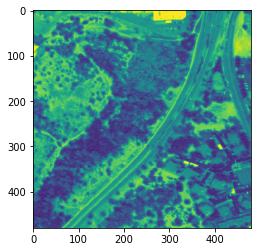

In [ ]:
utils.plot_image(datadir +'hurricane_florence/testfolder/post103001008856B300_pre103001008372E000/crop_pre_103001008372E000.png')

## Check xView2 image zoom level

In [ ]:
path = datadir +'xview-hurricane-florence-images/'
xview_florence = [path + a for a in os.listdir(path)]

In [ ]:
for i in xview_florence:
  utils.size_check(i)

0.0047035168318103615
0.0047028152182946314
0.004703041169634048
0.004704063148835758
0.004705094538692833
0.0047035168318103615
0.004703041169634048
0.0047028152182946314
0.004653082841656442
0.004704063148835758
0.0047036083549869545
0.0047036083549869545
0.004705094538692833
0.004653082841656442


## References:


get initial coords:
* https://stackoverflow.com/questions/2922532/obtain-latitude-and-longitude-from-a-geotiff-file

translate coords:
* https://stackoverflow.com/questions/38242716/how-to-crop-a-raster-image-by-coordinates-in-python

gdal docs:
* https://gdal.org/python/osgeo.gdal-module.html#TranslateOptions

visualize tifs:
* https://towardsdatascience.com/reading-and-visualizing-geotiff-images-with-python-8dcca7a74510

Maxar Open Data (Turkey Earthquake):
* https://www.maxar.com/open-data/turkey-earthquake